# What is Pneumonia?
**Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**
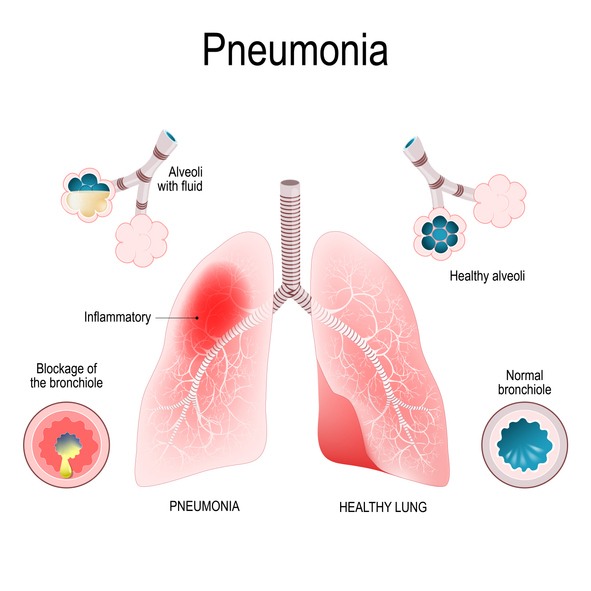

In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

input/.DS_Store
input/chest-xray-pneumonia/.DS_Store
input/chest-xray-pneumonia/chest_xray/.DS_Store
input/chest-xray-pneumonia/chest_xray/test/.DS_Store
input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg
input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg
input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg
input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg
input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1647_virus_2848.jpeg
input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1675_virus_2891.jpeg
input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person89_bacteria_440.jpeg
input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person35_virus_80.jpeg
input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg
input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person119_bacteria_565.jpeg
input/chest-xray-pneumonia/chest_xray/test/PN

# Importing the necessary libraries

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# Description of the Pneumonia Dataset
**The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.**

In [156]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Erro ao processar a imagem {img} da classe {label}: {e}")
                print(path)
    return np.array(data, dtype="object")

# Loading the Dataset

In [157]:
train = get_training_data('input/chest-xray-pneumonia/chest_xray/train')
test = get_training_data('input/chest-xray-pneumonia/chest_xray/test')
val = get_training_data('input/chest-xray-pneumonia/chest_xray/val')

Erro ao processar a imagem .DS_Store da classe PNEUMONIA: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA
Erro ao processar a imagem .DS_Store da classe NORMAL: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

input/chest-xray-pneumonia/chest_xray/train/NORMAL
Erro ao processar a imagem .DS_Store da classe PNEUMONIA: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA
Erro ao processar a imagem .DS_Store da classe NORMAL: OpenCV(4.10.0) /Users/xper

# Data Visualization & Preprocessing

<Axes: xlabel='count'>

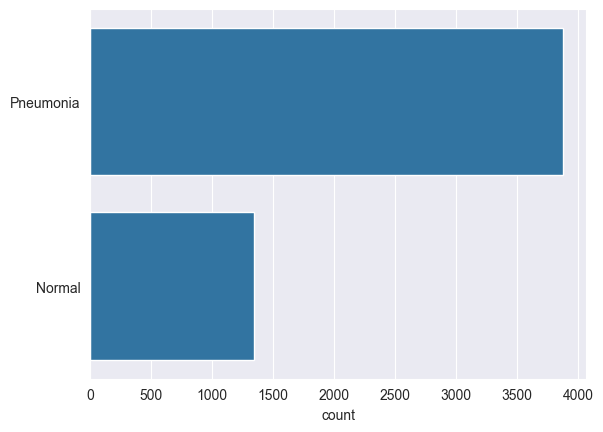

In [158]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)        

**The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

**Previewing the images of both the classes**

Text(0.5, 1.0, 'NORMAL')

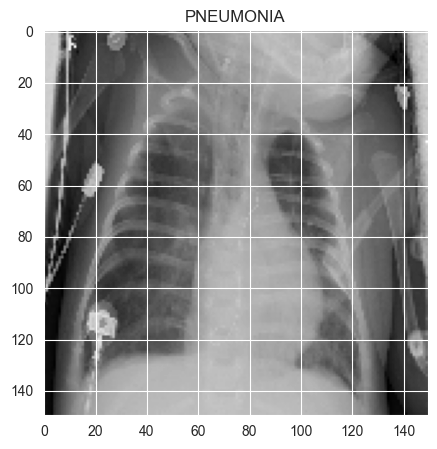

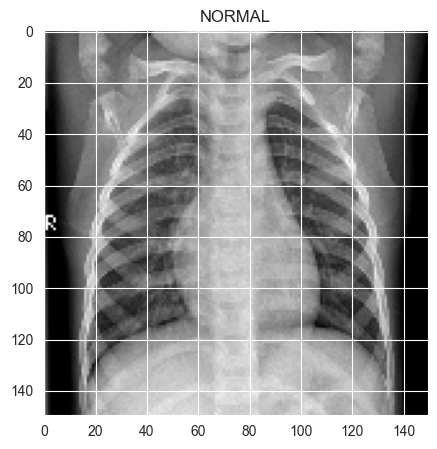

In [159]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [160]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

In [161]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [162]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# Data Augmentation
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

In [163]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

For the data augmentation, i choosed to :
1. Randomly rotate some training images by 30 degrees 
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width 
4. Randomly shift images vertically by 10% of the height 
5. Randomly flip images horizontally.
Once our model is ready, we fit the training dataset.

# Training the Model

In [164]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_95 (Conv2D)              │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 38, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_98 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_99 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [165]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [166]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12


/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 414ms/step - accuracy: 0.8055 - loss: 0.9194 - val_accuracy: 0.5000 - val_loss: 23.5453 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 399ms/step - accuracy: 0.8849 - loss: 0.3061 - val_accuracy: 0.5000 - val_loss: 36.8640 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.9213 - loss: 0.2371
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 485ms/step - accuracy: 0.9213 - loss: 0.2370 - val_accuracy: 0.5000 - val_loss: 10.7775 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 461ms/step - accuracy: 0.9517 - loss: 0.1535 - val_accuracy: 0.5000 - val_loss: 25.2797 - learning_rate: 3.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.9514 - loss: 0.1395
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 502ms/step - accuracy: 0.9514 - l

In [204]:
test_loss_passive = model.evaluate(x_test,y_test)[0]
print("Loss of the model is: " , test_loss_passive)
test_accuracy_passive = model.evaluate(x_test,y_test)[1]
print("Accuracy of the model is: " , test_accuracy_passive*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - accuracy: 0.9332 - loss: 0.1847
Loss of the model is:  0.2748856544494629
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 672ms/step - accuracy: 0.9332 - loss: 0.1847
Accuracy of the model is:  90.86538553237915 %


# Analysis after Model Training

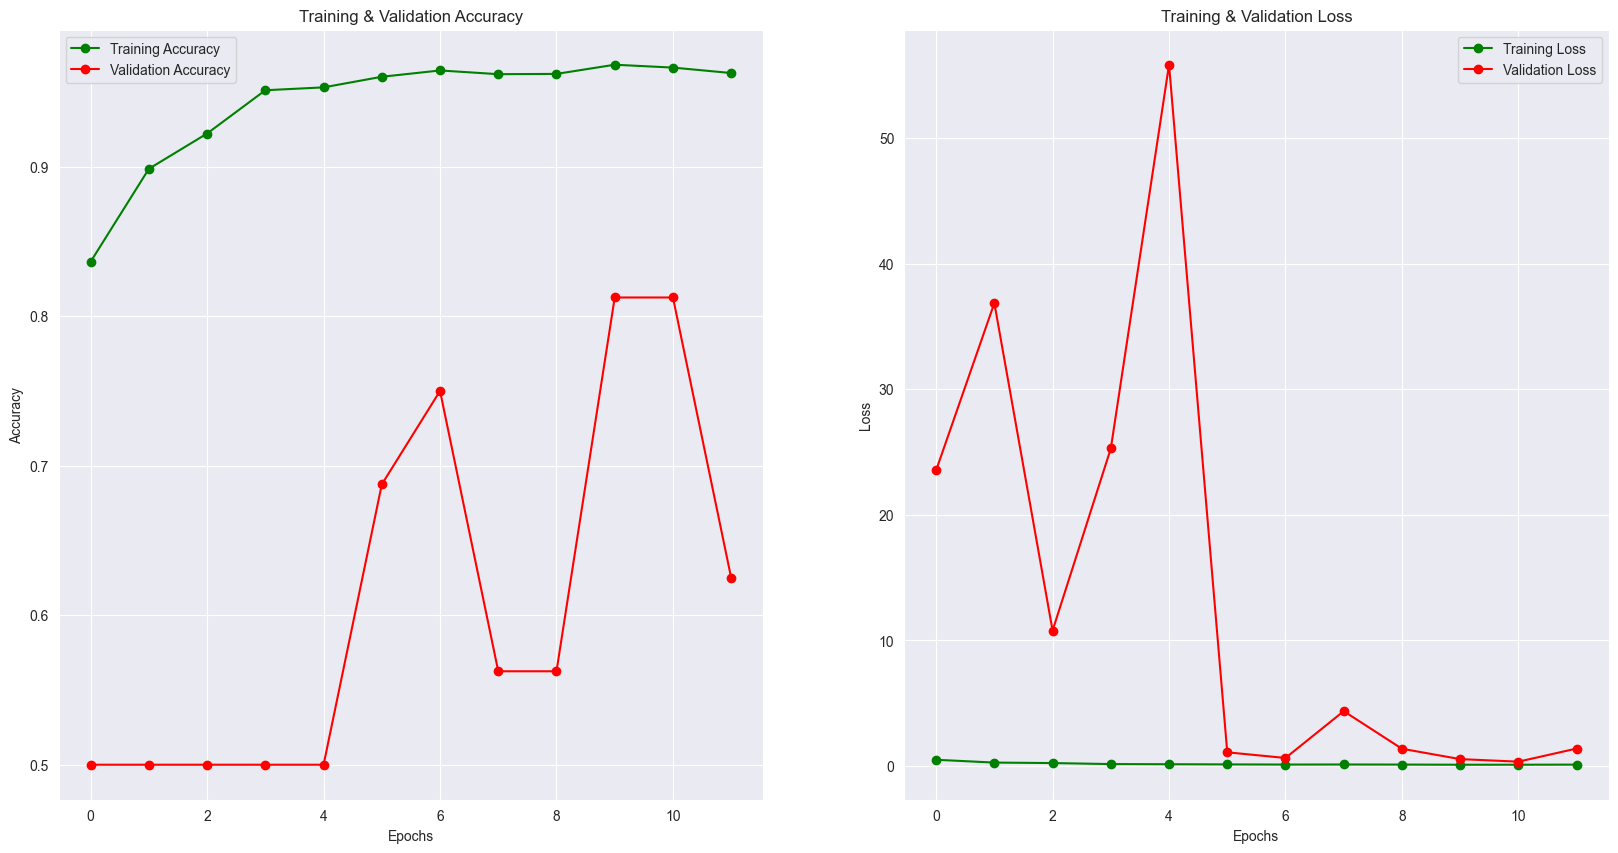

In [168]:
epochs = [i for i in range(12)]  # 12 training epochs

fig, ax = plt.subplots(1, 2)
train_acc_passive = history.history['accuracy']
train_loss_passive = history.history['loss']
val_acc_passive = history.history['val_accuracy']
val_loss_passive = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc_passive, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc_passive, 'ro-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss_passive, 'g-o', label='Training Loss')
ax[1].plot(epochs, val_loss_passive, 'r-o', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [169]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [170]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.91      0.94      0.93       390
   Normal (Class 1)       0.90      0.85      0.87       234

           accuracy                           0.91       624
          macro avg       0.91      0.90      0.90       624
       weighted avg       0.91      0.91      0.91       624



In [171]:
cm = confusion_matrix(y_test,predictions)
cm

array([[368,  22],
       [ 35, 199]])

In [172]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

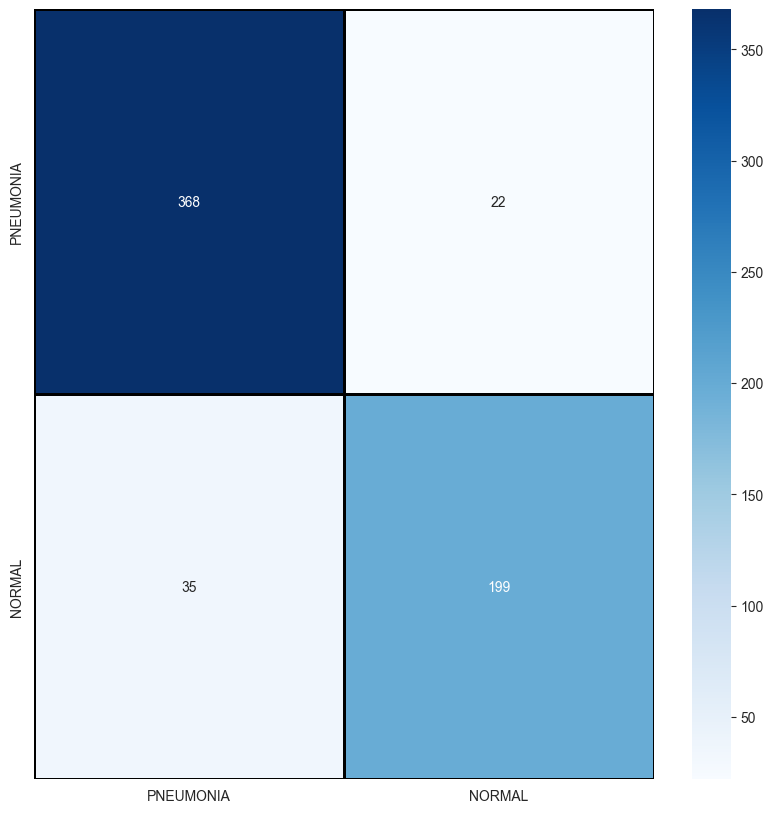

In [173]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [174]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

**Some of the Correctly Predicted Classes**

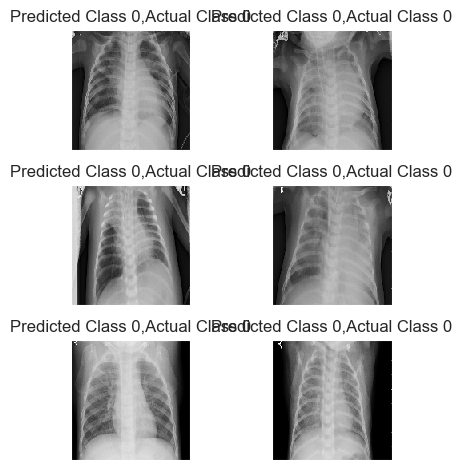

In [175]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

**Some of the Incorrectly Predicted Classes**

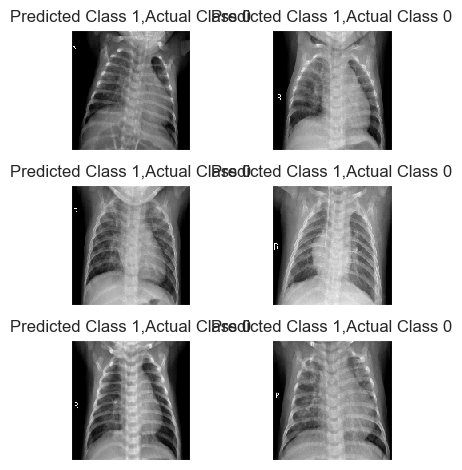

In [176]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

# Active Learning

Active Learning requires running the entire Jupyter Notebook first to make sure the following conditions:
- **Load Data**: Load and separate data into training, validation, and test sets.
- **Preprocessing**: Preprocessing steps, like data normalization and augmentation, must be completed before the data can be used for model training.
- **Passive Learning Test Accuracy**: The stop condition in the active learning loop is determined by the test accuracy of the passive learning model. 

## Importing the necessary libraries

In [177]:
import numpy as np
from imblearn.over_sampling import SMOTE
from modAL.models import ActiveLearner
from tensorflow.keras import Input # type: ignore
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Training the Model

The `create_advanced_cnn` function defines the CNN architecture used as an estimator in the active learning process. This model is identical to the passive learning baseline described in the Kaggle notebook [1], ensuring a fair comparison between active and passive learning. The function's design includes convolutional layers, dropout, batch normalization, and max-pooling, making it appropriate for pneumonia detection while allowing iterative training with dynamically labeled datasets in active learning.

### References:
1. Kaggle notebook: "Pneumonia Detection Using CNN 92.6% Accuracy". Available at: https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy/notebook

In [178]:
def create_advanced_cnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    
    model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    
    model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    
    model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    
    model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

The `custom_uncertainty_sampling` function was created to combine Keras models with the modAL framework and enabling the use of uncertainty sampling. It calculates sample uncertainty (predicted probabilities close to 0.5) and selects the most uncertain ones for compatibility with the iterative Active Learning process.

In [179]:
def custom_uncertainty_sampling(learner, X_pool, n_instances=10):
    probas = learner.estimator.predict(X_pool)  # Predict probabilities for the samples in the pool
    uncertainty = np.abs(probas - 0.5).flatten()  # Highest uncertainty is closest to 0.5
    query_idx = np.argsort(uncertainty)[:n_instances]
    return query_idx, X_pool[query_idx]

The line `datagen.fit(x_train)` applies data augmentation transformations to the initially labeled dataset in the active learning process, ensuring consistency with the passive learning approach. However, if data augmentation was already applied to the entire training dataset (`x_train`) during the passive learning phase, this step is redundant, as the same datagen instance retains the transformations. 

In [180]:
# datagen.fit(x_train)

The training dataset's class was balanced using `SMOTE`, which produced synthetic samples of the minority class. Data was flattened for compatibility, then resampled and shaped back to its original format. This makes a balanced dataset, which reduces bias and improves the model's learning performance.

In [198]:
print(len(x_train))
print(0.05 * len(x_train))

5216
260.8


In [182]:
# Apply SMOTE to the entire training dataset
n_samples, width, height, channels = x_train.shape
x_train_flat = x_train.reshape(n_samples, -1)

smote = SMOTE(random_state=42)
x_train_resampled_flat, y_train_resampled = smote.fit_resample(x_train_flat, y_train)

# Reshape the resampled data back to the original shape
x_train_resampled = x_train_resampled_flat.reshape(-1, width, height, channels)

In [199]:
print(len(x_train_resampled))
print(0.05 * len(x_train_resampled))

7750
387.5


Initial dataset configuration (5% of the balanced training data) and unlabeled pool

In [184]:
n_initial = int(0.05 * len(x_train_resampled)) 
initial_idx = np.random.choice(range(len(x_train_resampled)), size=n_initial, replace=False)

x_labeled, y_labeled = x_train_resampled[initial_idx], y_train_resampled[initial_idx]
x_unlabeled, y_unlabeled = np.delete(x_train_resampled, initial_idx, axis=0), np.delete(y_train_resampled, initial_idx, axis=0)

The CNN operates as the ActiveLearner estimator, using uncertainty sampling and the initial labeled dataset.

In [185]:
cnn = create_advanced_cnn(input_shape=(150, 150, 1))

learner = ActiveLearner(
    estimator=cnn,
    query_strategy=custom_uncertainty_sampling,  
    X_training=x_labeled,
    y_training=y_labeled
)

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 527ms/step - accuracy: 0.5531 - loss: 8.1468


This block manually implements `learning rate reduction` for the CNN model in Active Learning, as learner.teach() does not support callbacks like ReduceLROnPlateau. It replicates the behavior of the passive learning setup to ensure consistent training, avoid overfitting, and keep the same optimization strategies.

In [186]:
initial_lr = 0.001
learner.estimator.optimizer.learning_rate = initial_lr

patience = 2
factor = 0.3
min_lr = 1e-6
wait = 0
best_val_accuracy = 0

`alpha = 0.025` sets a 2.5% threshold as the stopping condition for Active Learning, where validation accuracy must approach the passive baseline test accuracy.

In [187]:
alpha = 0.025

The line `train_acc, train_loss, val_acc, val_loss = [], [], [], []` creates empty lists to keep track of training and validation metrics throughout the Active Learning cycle. This solution solves the teach() method's lack of validation tracking by verifying that the model's performance matches the Active Learning objectives and stopping conditions.

In [188]:
train_acc, train_loss, val_acc, val_loss = [], [], [], []

### Loop

This loop implements the `Active Learning process` by iteratively selecting the most `uncertain sample`s for labeling and updating the `model` with `augmented data` created by the datagen from the passive learning approach. Metrics for `training and validation` are recorded to track performance while `learning rate reduction` and `stopping conditions`, previously talked about, ensuring efficient and goal-aligned learning.

In [189]:
active_learning_iterations = 50
for iteration in range(active_learning_iterations):
    # Select the most uncertain samples
    query_idx, query_instance = learner.query(x_unlabeled, n_instances=10)
    y_new_labels = y_unlabeled[query_idx]

    # Update the labeled dataset with new samples
    x_labeled = np.concatenate((x_labeled, query_instance), axis=0)
    y_labeled = np.concatenate((y_labeled, y_new_labels), axis=0)

    # Update the unlabeled pool
    x_unlabeled = np.delete(x_unlabeled, query_idx, axis=0)
    y_unlabeled = np.delete(y_unlabeled, query_idx, axis=0)

    # Apply data augmentation to the labeled dataset
    train_generator = datagen.flow(x_labeled, y_labeled, batch_size=len(x_labeled), shuffle=False)
    x_augmented, y_augmented = next(train_generator)

    # Train the model with the augmented dataset
    learner.teach(X=x_augmented, y=y_augmented, epochs=12)

    # Evaluate metrics on the labeled dataset and validation set
    val_generator = datagen.flow(x_val, y_val)

    train_loss_iter, train_accuracy_iter = learner.estimator.evaluate(x_augmented, y_augmented, verbose=0)
    val_loss_iter, val_accuracy_iter = learner.estimator.evaluate(val_generator, verbose=0)

    train_acc.append(train_accuracy_iter)
    val_acc.append(val_accuracy_iter)
    train_loss.append(train_loss_iter)
    val_loss.append(val_loss_iter)

    # Manual learning rate reduction logic
    if val_accuracy_iter > best_val_accuracy:
        best_val_accuracy = val_accuracy_iter
        wait = 0  # Reset patience if performance improves
    else:
        wait += 1
        if wait >= patience:
            current_lr = learner.estimator.optimizer.learning_rate.numpy()
            new_lr = max(current_lr * factor, min_lr)
            learner.estimator.optimizer.learning_rate = new_lr
            print(f"Reducing learning rate to {new_lr:.6f}")
            wait = 0  # Reset patience after reducing learning rate
    
    # Stopping Condition
    if val_accuracy_iter >= test_accuracy_passive - alpha:
        print("Stopping criteria met: Active Learning accuracy is within the defined threshold.")
        break

    print(f"Iteration {iteration + 1}: Train Loss = {train_loss_iter:.4f}, Train Accuracy = {train_accuracy_iter:.4f}, Validation Loss = {val_loss_iter:.4f}, Validation Accuracy = {val_accuracy_iter:.4f}")

# Final Metrics
print("Final Train Losses:", train_loss)
print("Final Train Accuracies:", train_acc)
print("Final Validation Losses:", val_loss)
print("Final Validation Accuracies:", val_acc)

231/231 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step
Epoch 1/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 453ms/step - accuracy: 0.7798 - loss: 0.5423
Epoch 2/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 454ms/step - accuracy: 0.8640 - loss: 0.3844
Epoch 3/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 497ms/step - accuracy: 0.8648 - loss: 0.3917
Epoch 4/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 455ms/step - accuracy: 0.8952 - loss: 0.3127
Epoch 5/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 476ms/step - accuracy: 0.9063 - loss: 0.2455
Epoch 6/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 469ms/step - accuracy: 0.9310 - loss: 0.2015
Epoch 7/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 442ms/step - accuracy: 0.9399 - loss: 0.1726
Epoch 8/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 438ms/step - accuracy: 0.9246 - loss: 0.2088
Epoch 9/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 435ms/step - accuracy: 0.9442 - loss: 0.1408
Epoch 10/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 429ms/step - accuracy: 0.9787 - loss: 0.0604
Epoch 11/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 425ms/step - accuracy: 0.9590 - loss: 0.12

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Iteration 1: Train Loss = 13.1389, Train Accuracy = 0.5239, Validation Loss = 15.2119, Validation Accuracy = 0.5000
230/230 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step
Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 460ms/step - accuracy: 0.9619 - loss: 0.1325
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 441ms/step - accuracy: 0.9627 - loss: 0.1113
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 433ms/step - accuracy: 0.9722 - loss: 0.0737
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 425ms/step - accuracy: 0.9537 - loss: 0.1030
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 427ms/step - accuracy: 0.9828 - loss: 0.0605
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 424ms/step - accuracy: 0.9898 - loss: 0.0256
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 425ms/step - accuracy: 0.9907 - loss: 0.0260
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 425ms/step - accuracy: 0.9824 - loss: 0.0634
Epoch 9/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 424ms/step - accuracy: 0.9721 - loss: 0.0915
Epoch 10/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 425ms/step - ac

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Iteration 2: Train Loss = 0.1857, Train Accuracy = 0.9779, Validation Loss = 3.7303, Validation Accuracy = 0.6875
230/230 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step
Epoch 1/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 399ms/step - accuracy: 0.9491 - loss: 0.2318
Epoch 2/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 401ms/step - accuracy: 0.9815 - loss: 0.0703
Epoch 3/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 407ms/step - accuracy: 0.9837 - loss: 0.0437
Epoch 4/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 411ms/step - accuracy: 0.9893 - loss: 0.0396
Epoch 5/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 416ms/step - accuracy: 0.9720 - loss: 0.0729
Epoch 6/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 425ms/step - accuracy: 0.9872 - loss: 0.0410
Epoch 7/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 414ms/step - accuracy: 0.9891 - loss: 0.0520
Epoch 8/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 415ms/step - accuracy: 0.9923 - loss: 0.0138
Epoch 9/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 438ms/step - accuracy: 0.9873 - loss: 0.0427
Epoch 10/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 439ms/step - accu

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Iteration 3: Train Loss = 0.7397, Train Accuracy = 0.9233, Validation Loss = 4.2339, Validation Accuracy = 0.6250
230/230 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step
Epoch 1/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 465ms/step - accuracy: 0.9779 - loss: 0.0978
Epoch 2/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 440ms/step - accuracy: 0.9842 - loss: 0.0463
Epoch 3/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 422ms/step - accuracy: 0.9890 - loss: 0.0408
Epoch 4/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 29s 448ms/step - accuracy: 0.9915 - loss: 0.0327
Epoch 5/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 423ms/step - accuracy: 0.9894 - loss: 0.0329
Epoch 6/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 29s 454ms/step - accuracy: 0.9903 - loss: 0.0306
Epoch 7/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 413ms/step - accuracy: 0.9957 - loss: 0.0166
Epoch 8/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 29s 450ms/step - accuracy: 0.9929 - loss: 0.0235
Epoch 9/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 444ms/step - accuracy: 0.9926 - loss: 0.0239
Epoch 10/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 418ms/step - accu

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Reducing learning rate to 0.000300
Iteration 4: Train Loss = 0.0495, Train Accuracy = 0.9813, Validation Loss = 3.7169, Validation Accuracy = 0.6875
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step
Epoch 1/12
78/78 ━━━━━━━━━━━━━━━━━━━━ 33s 430ms/step - accuracy: 0.9866 - loss: 0.1305
Epoch 2/12
78/78 ━━━━━━━━━━━━━━━━━━━━ 38s 482ms/step - accuracy: 0.9913 - loss: 0.0255
Epoch 3/12
78/78 ━━━━━━━━━━━━━━━━━━━━ 35s 452ms/step - accuracy: 0.9961 - loss: 0.0172
Epoch 4/12
78/78 ━━━━━━━━━━━━━━━━━━━━ 35s 449ms/step - accuracy: 0.9974 - loss: 0.0058
Epoch 5/12
78/78 ━━━━━━━━━━━━━━━━━━━━ 35s 447ms/step - accuracy: 0.9966 - loss: 0.0076
Epoch 6/12
78/78 ━━━━━━━━━━━━━━━━━━━━ 36s 464ms/step - accuracy: 0.9987 - loss: 0.0027
Epoch 7/12
78/78 ━━━━━━━━━━━━━━━━━━━━ 33s 418ms/step - accuracy: 0.9998 - loss: 0.0021
Epoch 8/12
78/78 ━━━━━━━━━━━━━━━━━━━━ 32s 414ms/step - accuracy: 0.9995 - loss: 0.0014
Epoch 9/12
78/78 ━━━━━━━━━━━━━━━━━━━━ 32s 415ms/step - accuracy: 0.9957 - loss: 0.0119
Epoch 10/12
78/78 ━━━━━━━

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Iteration 5: Train Loss = 0.0173, Train Accuracy = 0.9954, Validation Loss = 4.4905, Validation Accuracy = 0.7500
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step
Epoch 1/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 417ms/step - accuracy: 0.9895 - loss: 0.0591
Epoch 2/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 440ms/step - accuracy: 0.9942 - loss: 0.0159
Epoch 3/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 434ms/step - accuracy: 0.9952 - loss: 0.0094
Epoch 4/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 426ms/step - accuracy: 0.9972 - loss: 0.0078
Epoch 5/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 426ms/step - accuracy: 0.9993 - loss: 0.0025
Epoch 6/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 471ms/step - accuracy: 0.9990 - loss: 0.0051
Epoch 7/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 458ms/step - accuracy: 0.9971 - loss: 0.0085
Epoch 8/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 438ms/step - accuracy: 0.9995 - loss: 0.0017
Epoch 9/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 437ms/step - accuracy: 0.9997 - loss: 0.0025
Epoch 10/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 424ms/step - accu

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Iteration 6: Train Loss = 0.0190, Train Accuracy = 0.9955, Validation Loss = 3.5717, Validation Accuracy = 0.7500
229/229 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step
Epoch 1/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 43s 411ms/step - accuracy: 0.9918 - loss: 0.0737
Epoch 2/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 40s 374ms/step - accuracy: 0.9929 - loss: 0.0286
Epoch 3/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 40s 379ms/step - accuracy: 0.9983 - loss: 0.0061
Epoch 4/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 39s 369ms/step - accuracy: 0.9982 - loss: 0.0084
Epoch 5/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 382ms/step - accuracy: 0.9972 - loss: 0.0136
Epoch 6/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 42s 393ms/step - accuracy: 0.9989 - loss: 0.0037
Epoch 7/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 42s 396ms/step - accuracy: 0.9980 - loss: 0.0039
Epoch 8/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 45s 427ms/step - accuracy: 0.9983 - loss: 0.0052
Epoch 9/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 46s 431ms/step - accuracy: 0.9998 - loss: 0.0011
Epoch 10/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 4

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Reducing learning rate to 0.000090
Iteration 7: Train Loss = 0.0004, Train Accuracy = 1.0000, Validation Loss = 4.0208, Validation Accuracy = 0.7500
228/228 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step
Epoch 1/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 50s 410ms/step - accuracy: 0.9950 - loss: 0.0541
Epoch 2/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 51s 418ms/step - accuracy: 0.9959 - loss: 0.0262
Epoch 3/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 49s 406ms/step - accuracy: 0.9958 - loss: 0.0142
Epoch 4/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 52s 426ms/step - accuracy: 0.9988 - loss: 0.0078
Epoch 5/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 45s 372ms/step - accuracy: 0.9959 - loss: 0.0091
Epoch 6/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 44s 365ms/step - accuracy: 0.9994 - loss: 0.0041
Epoch 7/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 45s 372ms/step - accuracy: 0.9988 - loss: 0.0037
Epoch 8/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 45s 374ms/step - accuracy: 0.9979 - loss: 0.0035
Epoch 9/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 47s 385ms/step - accuracy: 0.9992 - loss: 0.0014
Epoch 1

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Iteration 8: Train Loss = 0.0027, Train Accuracy = 1.0000, Validation Loss = 2.7606, Validation Accuracy = 0.7500
228/228 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step
Epoch 1/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 53s 394ms/step - accuracy: 0.9943 - loss: 0.0272
Epoch 2/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 382ms/step - accuracy: 0.9940 - loss: 0.0261
Epoch 3/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 51s 376ms/step - accuracy: 0.9961 - loss: 0.0128
Epoch 4/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 388ms/step - accuracy: 0.9981 - loss: 0.0045
Epoch 5/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 53s 396ms/step - accuracy: 0.9961 - loss: 0.0131
Epoch 6/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 53s 396ms/step - accuracy: 0.9992 - loss: 0.0029
Epoch 7/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 388ms/step - accuracy: 0.9985 - loss: 0.0058
Epoch 8/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 55s 409ms/step - accuracy: 0.9999 - loss: 0.0011
Epoch 9/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 59s 436ms/step - accuracy: 0.9997 - loss: 0.0015
Epoch 10/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 5

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Reducing learning rate to 0.000027
Iteration 9: Train Loss = 0.0032, Train Accuracy = 1.0000, Validation Loss = 1.3878, Validation Accuracy = 0.6875
228/228 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step
Epoch 1/12
151/151 ━━━━━━━━━━━━━━━━━━━━ 62s 410ms/step - accuracy: 0.9953 - loss: 0.0396
Epoch 2/12
151/151 ━━━━━━━━━━━━━━━━━━━━ 62s 411ms/step - accuracy: 0.9942 - loss: 0.0321
Epoch 3/12
151/151 ━━━━━━━━━━━━━━━━━━━━ 62s 412ms/step - accuracy: 0.9968 - loss: 0.0102
Epoch 4/12
151/151 ━━━━━━━━━━━━━━━━━━━━ 64s 422ms/step - accuracy: 0.9951 - loss: 0.0226
Epoch 5/12
151/151 ━━━━━━━━━━━━━━━━━━━━ 64s 425ms/step - accuracy: 0.9967 - loss: 0.0174
Epoch 6/12
151/151 ━━━━━━━━━━━━━━━━━━━━ 69s 455ms/step - accuracy: 0.9970 - loss: 0.0101
Epoch 7/12
151/151 ━━━━━━━━━━━━━━━━━━━━ 73s 481ms/step - accuracy: 0.9984 - loss: 0.0084
Epoch 8/12
151/151 ━━━━━━━━━━━━━━━━━━━━ 67s 446ms/step - accuracy: 0.9979 - loss: 0.0055
Epoch 9/12
151/151 ━━━━━━━━━━━━━━━━━━━━ 63s 419ms/step - accuracy: 0.9957 - loss: 0.0111
Epoch 1

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Iteration 10: Train Loss = 0.0123, Train Accuracy = 0.9959, Validation Loss = 2.8256, Validation Accuracy = 0.6250
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step
Epoch 1/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 71s 429ms/step - accuracy: 0.9953 - loss: 0.0401
Epoch 2/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 70s 421ms/step - accuracy: 0.9954 - loss: 0.0357
Epoch 3/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 70s 424ms/step - accuracy: 0.9936 - loss: 0.0311
Epoch 4/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 71s 425ms/step - accuracy: 0.9972 - loss: 0.0519
Epoch 5/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 70s 424ms/step - accuracy: 0.9952 - loss: 0.0136
Epoch 6/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 71s 428ms/step - accuracy: 0.9940 - loss: 0.0341
Epoch 7/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 73s 439ms/step - accuracy: 0.9947 - loss: 0.0443
Epoch 8/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 70s 420ms/step - accuracy: 0.9941 - loss: 0.0193
Epoch 9/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 72s 436ms/step - accuracy: 0.9984 - loss: 0.0080
Epoch 10/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Reducing learning rate to 0.000008
Iteration 11: Train Loss = 0.0444, Train Accuracy = 0.9980, Validation Loss = 2.1424, Validation Accuracy = 0.6250
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step
Epoch 1/12
182/182 ━━━━━━━━━━━━━━━━━━━━ 79s 433ms/step - accuracy: 0.9919 - loss: 0.0533
Epoch 2/12
182/182 ━━━━━━━━━━━━━━━━━━━━ 76s 418ms/step - accuracy: 0.9942 - loss: 0.0324
Epoch 3/12
182/182 ━━━━━━━━━━━━━━━━━━━━ 77s 421ms/step - accuracy: 0.9939 - loss: 0.0359
Epoch 4/12
182/182 ━━━━━━━━━━━━━━━━━━━━ 77s 422ms/step - accuracy: 0.9934 - loss: 0.0312
Epoch 5/12
182/182 ━━━━━━━━━━━━━━━━━━━━ 77s 426ms/step - accuracy: 0.9940 - loss: 0.0299
Epoch 6/12
182/182 ━━━━━━━━━━━━━━━━━━━━ 77s 420ms/step - accuracy: 0.9952 - loss: 0.0348
Epoch 7/12
182/182 ━━━━━━━━━━━━━━━━━━━━ 77s 421ms/step - accuracy: 0.9930 - loss: 0.0324
Epoch 8/12
182/182 ━━━━━━━━━━━━━━━━━━━━ 78s 427ms/step - accuracy: 0.9946 - loss: 0.0247
Epoch 9/12
182/182 ━━━━━━━━━━━━━━━━━━━━ 78s 429ms/step - accuracy: 0.9951 - loss: 0.0213
Epoch 

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Iteration 12: Train Loss = 0.1137, Train Accuracy = 0.9684, Validation Loss = 2.3060, Validation Accuracy = 0.7500
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step
Epoch 1/12
198/198 ━━━━━━━━━━━━━━━━━━━━ 85s 429ms/step - accuracy: 0.9873 - loss: 0.0630
Epoch 2/12
198/198 ━━━━━━━━━━━━━━━━━━━━ 85s 429ms/step - accuracy: 0.9897 - loss: 0.0555
Epoch 3/12
198/198 ━━━━━━━━━━━━━━━━━━━━ 84s 423ms/step - accuracy: 0.9902 - loss: 0.0474
Epoch 4/12
198/198 ━━━━━━━━━━━━━━━━━━━━ 85s 427ms/step - accuracy: 0.9902 - loss: 0.0385
Epoch 5/12
198/198 ━━━━━━━━━━━━━━━━━━━━ 83s 419ms/step - accuracy: 0.9914 - loss: 0.0330
Epoch 6/12
198/198 ━━━━━━━━━━━━━━━━━━━━ 84s 425ms/step - accuracy: 0.9915 - loss: 0.0310
Epoch 7/12
198/198 ━━━━━━━━━━━━━━━━━━━━ 86s 432ms/step - accuracy: 0.9901 - loss: 0.0353
Epoch 8/12
198/198 ━━━━━━━━━━━━━━━━━━━━ 85s 428ms/step - accuracy: 0.9931 - loss: 0.0269
Epoch 9/12
198/198 ━━━━━━━━━━━━━━━━━━━━ 84s 424ms/step - accuracy: 0.9936 - loss: 0.0348
Epoch 10/12
198/198 ━━━━━━━━━━━━━━━━━━━━ 

/opt/anaconda3/envs/IA/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


## Analysis after Model Training

### Test

In [200]:
final_loss, final_accuracy = learner.estimator.evaluate(x_test, y_test, verbose=0)
print("Final Loss of the model is: ", final_loss)
test_accuracy_active = final_accuracy
print("Accuracy of the model is: ", test_accuracy_active * 100, "%")

Final Loss of the model is:  1.2223268747329712
Accuracy of the model is:  91.34615659713745 %


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.89      0.98      0.93       390
   Normal (Class 1)       0.96      0.80      0.87       234

           accuracy                           0.91       624
          macro avg       0.93      0.89      0.90       624
       weighted avg       0.92      0.91      0.91       624



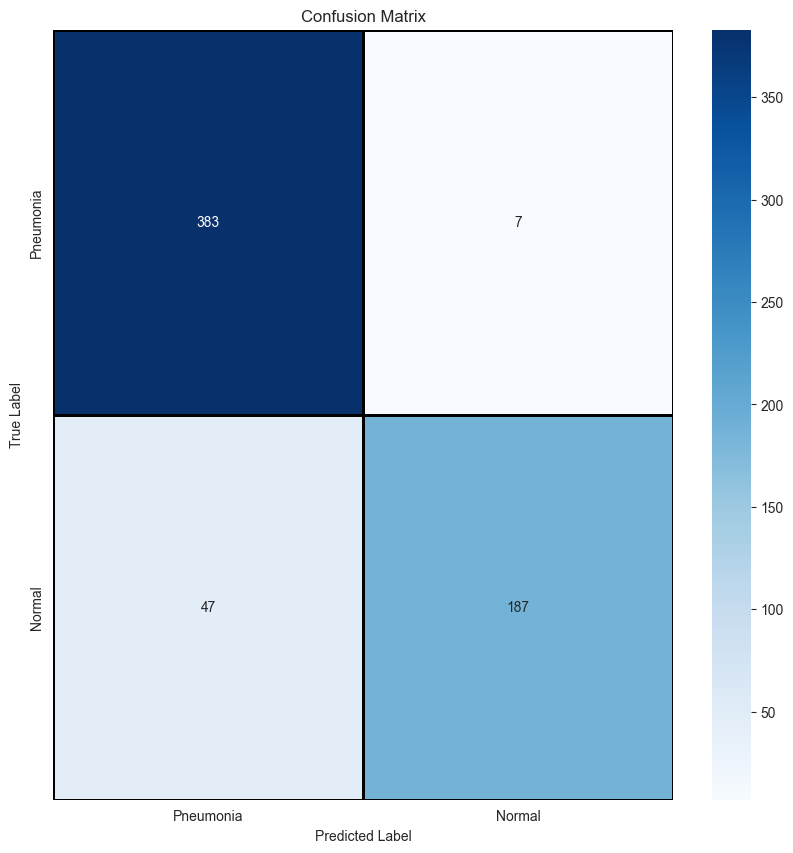

In [191]:
# Predictions on the test set
predictions = (learner.estimator.predict(x_test) > 0.5).astype("int32").reshape(1, -1)[0]

# Classification Report
print(classification_report(y_test, predictions, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=['Pneumonia', 'Normal'], columns=['Pneumonia', 'Normal'])

plt.figure(figsize=(10, 10))
sns.heatmap(cm_df, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Training and Validation

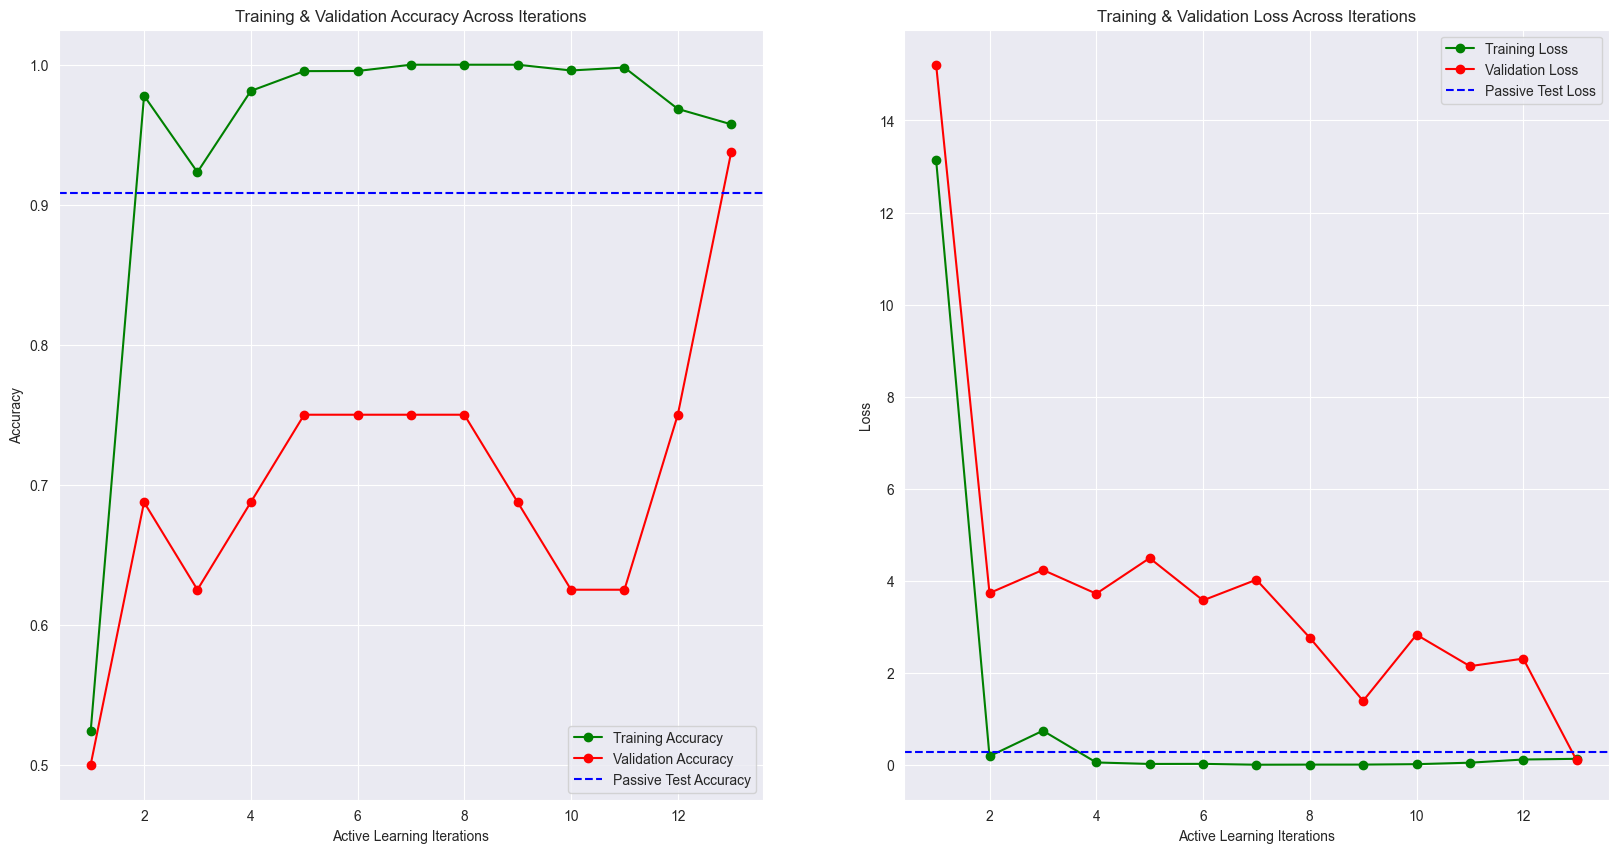

In [206]:
iterations = [i for i in range(1, len(train_acc) + 1)]

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

# Accuracy Graphic
ax[0].plot(iterations, train_acc, 'go-', label='Training Accuracy')
ax[0].plot(iterations, val_acc, 'ro-', label='Validation Accuracy')
ax[0].axhline(y=test_accuracy_passive, color='b', linestyle='--', label='Passive Test Accuracy')
ax[0].set_title('Training & Validation Accuracy Across Iterations')
ax[0].legend()
ax[0].set_xlabel("Active Learning Iterations")
ax[0].set_ylabel("Accuracy")

# Loss Graphic
ax[1].plot(iterations, train_loss, 'g-o', label='Training Loss')
ax[1].plot(iterations, val_loss, 'r-o', label='Validation Loss')
ax[1].axhline(y=test_loss_passive, color='b', linestyle='--', label='Passive Test Loss')
ax[1].set_title('Training & Validation Loss Across Iterations')
ax[1].legend()
ax[1].set_xlabel("Active Learning Iterations")
ax[1].set_ylabel("Loss")

plt.show()